In [1]:
import pandas as pd

In [43]:
dc = pd.read_csv('/content/drive/MyDrive/KDT/offline/mini_project/github/diningcode.csv')
mp = pd.read_csv('/content/drive/MyDrive/KDT/offline/mini_project/github/mango.csv')
po = pd.read_csv('/content/drive/MyDrive/KDT/offline/mini_project/github/poing.csv')
si = pd.read_csv('/content/drive/MyDrive/KDT/offline/mini_project/github/식신.csv')
na = pd.read_csv('/content/drive/MyDrive/KDT/offline/mini_project/github/네이버.csv')

In [44]:
dc.head(1)

,Unnamed: 0,Unnamed: 0.1,이름,점수,주소,리뷰수,전화번호,태그,카테고리,별점,표준화
0,0,0,소문난 성수 감자탕,82,연무장길 45,88,02-465-6580,감자탕,한식,4.3,3.877178


In [45]:
dining = dc.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
dining['별점'] = dining['표준화']
dining = dining.drop(['표준화','점수'],axis=1) 
dining['가게수'] = 1
dining = dining.rename(columns={'별점':'평점'})
dining.head(2)

,이름,주소,리뷰수,전화번호,태그,카테고리,평점,가게수
0,소문난 성수 감자탕,연무장길 45,88,02-465-6580,감자탕,한식,3.877178,1
1,르프리크,연무장5길 9-16,25,02-2054-0119,치킨버거,양식,2.729451,1


In [46]:
#주소에서 필요한 도로명만 가져오기
address = dining['주소']
temp = []
for add in address:
  temp.append(add.split(' ')[0])
dining['주소'] = temp
dining.head(2)

,이름,주소,리뷰수,전화번호,태그,카테고리,평점,가게수
0,소문난 성수 감자탕,연무장길,88,02-465-6580,감자탕,한식,3.877178,1
1,르프리크,연무장5길,25,02-2054-0119,치킨버거,양식,2.729451,1


In [47]:
mp.head(1)

,Unnamed: 0,이름,별점,주소,종류,공통카테고리,길,식당수,별점.1
0,0,미오도쿄다이닝,4.8,서울특별시 성동구 연무장5가길 7 현대테라스타워 117호\n,\n퓨전 일식\n,일식,연무장5가길,1,2.749638


In [48]:
manggo = mp.drop('Unnamed: 0',axis=1)
manggo['별점'] = manggo['별점.1']
manggo = manggo.drop('별점.1',axis=1)
manggo = manggo.rename(columns={'별점':'평점','식당수':'가게수'})
manggo.head(2)

,이름,평점,주소,종류,공통카테고리,길,가게수
0,미오도쿄다이닝,2.749638,서울특별시 성동구 연무장5가길 7 현대테라스타워 117호\n,\n퓨전 일식\n,일식,연무장5가길,1
1,가조쿠,1.681058,서울특별시 성동구 연무장길 31-2 1F\n,\n라멘 / 소바 / 우동\n,일식,연무장길,1


In [49]:
#주소에서 필요한 도로명만 가져오기
address = manggo['주소']
temp = []
for add in address:
  add = add.split(' ')[2]
  temp.append(add)
manggo['주소'] = temp
manggo.head(2)

,이름,평점,주소,종류,공통카테고리,길,가게수
0,미오도쿄다이닝,2.749638,연무장5가길,\n퓨전 일식\n,일식,연무장5가길,1
1,가조쿠,1.681058,연무장길,\n라멘 / 소바 / 우동\n,일식,연무장길,1


In [50]:
po.head(1)

,Unnamed: 0,이름,평점,평점표준화,리뷰수,카테고리,도로명,count,사이트
0,0,호야 (건대점),3.0,-1.148226,45.0,일식,능동로13길,1,포잉


In [51]:
poing = po.drop('Unnamed: 0',axis=1)
poing['평점'] = poing['평점표준화']
poing = poing.drop('평점표준화',axis=1)
poing = poing.rename(columns={'count':'가게수','도로명':'주소'})
poing.head(5)

,이름,평점,리뷰수,카테고리,주소,가게수,사이트
0,호야 (건대점),-1.148226,45.0,일식,능동로13길,1,포잉
1,포지티브 제로 라운지,0.345484,11.0,펍,연무장길,1,포잉
2,중앙감속기,1.199033,62.0,중식,성수일로6길,1,포잉
3,장고키친,0.452178,10.0,한식,서울숲길,1,포잉
4,누메로도스,-0.187984,17.0,양식,상원1길,1,포잉


In [52]:
si.head(1)

,Unnamed: 0,이름,평점,주소,카테고리,조회수
0,0,성수 도치피자,3.9,서울특별시 성동구 연무장길 7,양식,4044


In [53]:
siksin = si.drop('Unnamed: 0',axis=1)
siksin['가게수'] = 1
siksin['평점'] = (siksin['평점']-siksin['평점'].mean()) / siksin['평점'].std()
address = siksin['주소']
temp = []
for add in address:
  if pd.isna(add):
    temp.append('주소없음')
    continue
  temp.append(add.split(' ')[2])
siksin['주소'] = temp
siksin.head(2)

,이름,평점,주소,카테고리,조회수,가게수
0,성수 도치피자,1.143202,연무장길,양식,4044,1
1,꿉당 성수점,-1.011959,성수이로20길,고기,565,1


In [81]:
na = pd.read_csv('/content/drive/MyDrive/KDT/offline/mini_project/github/네이버.csv')
na.head(1)

,Unnamed: 0,가게이름,전화번호,카테고리,주소,운영시간,홈페이지,메뉴,블로그리뷰수
0,0,어니언 성수,070-4353-3238,카페/디저트,아차산로9길 8 어니언,평일 08:00~22:00 last order 21:30 | 주말 10:00~22:...,http://onionkr.com,"에스프레소 4,300 | 에스프레소 콘파냐 4,800 | 아메리카노 5,000 | ...",4347


In [83]:
naver = na.drop('Unnamed: 0',axis=1) # 불필요한 컬럼삭제
naver = naver[['가게이름','주소','블로그리뷰수','카테고리']]
naver = naver.rename(columns={'가게이름':'이름'})
naver['가게수'] = 1
#주소에서 필요한 도로명만 가져오기
address = naver['주소']
temp = []
for add in address:
  temp.append(add.split(' ')[1])
naver['주소'] = temp
naver.head(1)

,이름,주소,블로그리뷰수,카테고리,가게수
0,어니언 성수,아차산로9길,4347,카페/디저트,1


In [85]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (42.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

평점을 갖는 네이버 외 나머지 사이트끼리 확인

In [86]:
# 주소로 묶기 함수화
def find_sum(df):
  return df.groupby(index).sum().sort_values('count', ascending=False)

In [87]:
def graph(df): # 그래프 그리기 함수화
  # 가게수와 평점 같이 나오게하는 그래프
  plt.plot(df[['평점','가게수']][:5])
  plt.xlabel('가게이름')
  plt.ylabel('평점(표준화)')
  plt.show()
  # 가게수 TOP5
  x = [0,1,2,3,4]
  plt.bar(x,df['가게수'][:5],color =['y', 'dodgerblue', 'C2'])
  plt.xlabel('가게이름')
  plt.ylabel('가게수')
  plt.xticks(x, df.index[:5])
  plt.show()
  # 평점 TOP5
  plt.bar(x,df['평점'][:5],color =['y', 'dodgerblue', 'C2'])
  plt.xticks(x, df.index[:5])
  plt.xlabel('가게이름')
  plt.ylabel('평점(표준화)')
  plt.show()

In [88]:
p = poing.groupby('주소').sum().sort_values(['가게수','평점'],ascending=False)
m = manggo.groupby('주소').sum().sort_values(['가게수','평점'],ascending=False)
d = dining.groupby('주소').sum().sort_values('가게수',ascending=False)

In [89]:
s = siksin.groupby('주소').sum().sort_values('가게수',ascending=False)
s = s.drop('주소없음',axis=0) # 주소없는값 drop

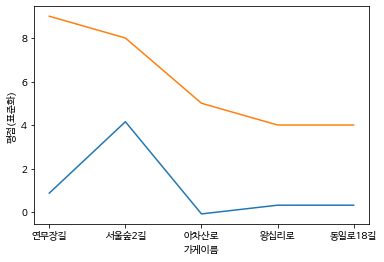

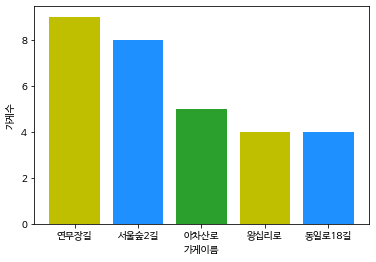

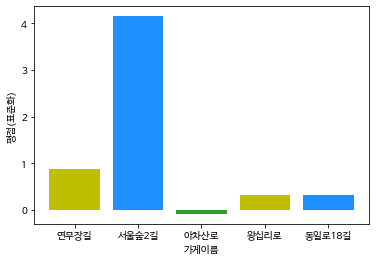

In [ ]:
graph(p)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


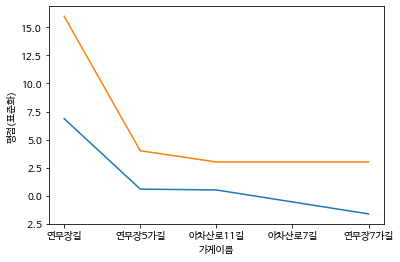

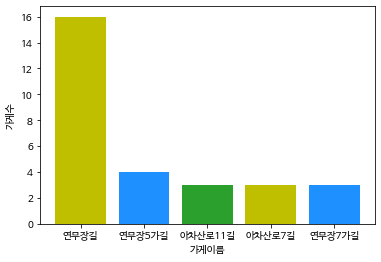

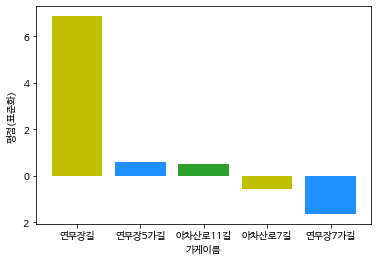

In [ ]:
graph(m)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


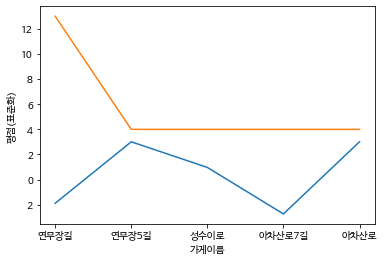

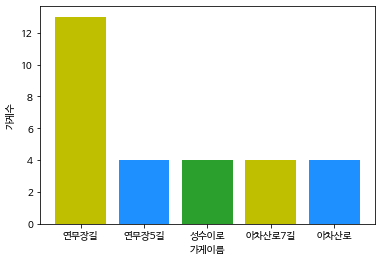

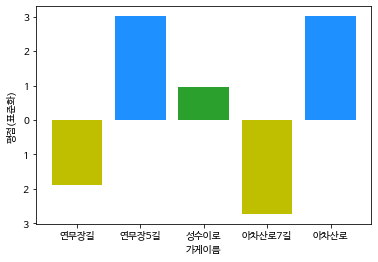

In [ ]:
graph(d)

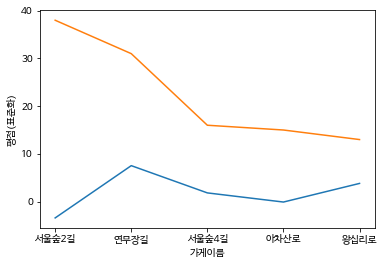

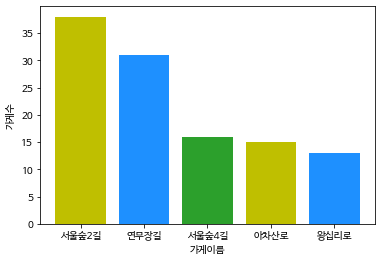

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


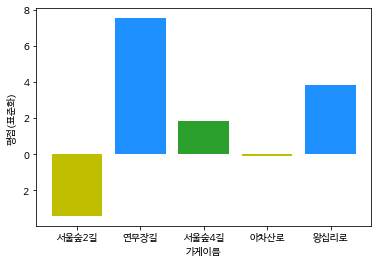

In [ ]:
graph(s)

In [94]:
# poing  평점,리뷰수,가게수 p
# dining 평점,리뷰수,가게수 d
# manggo 평점,가게수 m
# siksin 평점,조회수,가게수 s

# 모든 맛집사이트에서 중복되는 도로명주소 뽑아오기(?)
t1 = pd.merge(p,d, how='inner',on='주소')
t2 = pd.merge(t1,m,how='inner',on='주소')
t3 = pd.merge(t2,s,how='inner',on='주소')
t3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'가게수_x', '평점_x'} in the result is deprecated and will raise a MergeError in a future version.
  if __name__ == '__main__':


,평점_x,리뷰수_x,가게수_x,리뷰수_y,평점_y,가게수_y,평점_x,가게수_x,평점_y,조회수,가게수_y
주소,,,,,,,,,,,
연무장길,0.868791,98.0,9,176,-1.882025,13,6.861063,16,7.532702,83464,31
아차산로,-0.086371,42.0,5,76,3.011240,4,0.156378,2,-0.093252,47825,15
성수이로,-1.498791,34.0,4,35,0.970837,4,-2.782217,2,0.787463,42800,12
연무장5가길,2.479356,3.0,1,19,0.051421,1,0.579900,4,1.809783,24822,4
아차산로9길,-0.081290,23.0,1,81,2.143246,2,-3.505463,3,1.143202,1960,1
연무장7길,-0.081290,3.0,1,5,0.178947,1,0.879624,1,-2.023917,1740,2
연무장7가길,-0.721452,9.0,1,56,0.485419,2,-1.635448,3,-1.561110,10191,4


In [95]:
temp = t3.copy()
add_list = temp.index
mean_list = []
review_list = []
count_list = []
for add in add_list:
  x_rating = temp.loc[add]['평점_x'].sum()
  y_rating = temp.loc[add]['평점_y'].sum()
  x_review = temp.loc[add]['리뷰수_x'].sum()
  y_review = temp.loc[add]['리뷰수_y'].sum()
  x_count = temp.loc[add]['가게수_x'].sum()
  y_count = temp.loc[add]['가게수_y'].sum()

  sum_count = x_count+y_count
  mean_rating = (x_rating+y_rating)/4
  sum_review = x_review+y_review
  mean_list.append(mean_rating)
  review_list.append(sum_review)
  count_list.append(sum_count)

temp['가게수총합'] = count_list # 가게수총합(중복제거안함)
temp['평점평균'] = mean_list
temp['리뷰수총합'] = review_list
temp = temp.drop(['평점_x','평점_y','리뷰수_x','리뷰수_y','가게수_x','가게수_y','조회수'],axis=1)
temp

,가게수총합,평점평균,리뷰수총합
주소,,,
연무장길,69.0,3.345133,274.0
아차산로,26.0,0.746999,118.0
성수이로,22.0,-0.630677,69.0
연무장5가길,10.0,1.230115,22.0
아차산로9길,7.0,-0.075076,104.0
연무장7길,5.0,-0.261659,8.0
연무장7가길,10.0,-0.858148,65.0


In [96]:
temp.describe()

,가게수총합,평점평균,리뷰수총합
count,7.000000,7.000000,7.000000
mean,21.285714,0.499527,94.285714
std,22.447823,1.456176,88.620378
min,5.000000,-0.858148,8.000000
25%,8.500000,-0.446168,43.500000
50%,10.000000,-0.075076,69.000000
75%,24.000000,0.988557,111.000000
max,69.000000,3.345133,274.000000


In [106]:
temp.sort_values('평점평균',ascending=False)[:3]  #결론

,가게수총합,평점평균,리뷰수총합
주소,,,
연무장길,69.0,3.345133,274.0
연무장5가길,10.0,1.230115,22.0
아차산로,26.0,0.746999,118.0


네이버엔 평점이 없어서 따로 진행

In [90]:
#네이버 주소로 묶기 함수화
def find_sum(df,sort):
  if sort == '가게수':
    return df.groupby('주소').sum().sort_values('가게수', ascending=False)
  elif sort =='블로그리뷰수':
    return df.groupby('주소').sum().sort_values('블로그리뷰수', ascending=False)

In [92]:
naver1 = naver.copy()
naver_sum1 = find_sum(naver1,'가게수')
naver_sum1[:5]

,블로그리뷰수,가게수
주소,,
연무장길,12520,45
아차산로,5312,37
아차산로7길,4272,27
연무장5가길,3131,21
동일로18길,8591,20


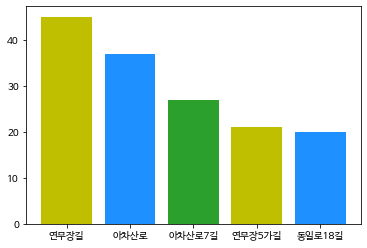

In [ ]:
# 가게수많은 길 TOP5 시각화
x = [0,1,2,3,4]
plt.bar(x,naver_sum1['가게수'][:5],color =['y', 'dodgerblue', 'C2'])
plt.xticks(x, naver_sum1.index[:5])
plt.show()

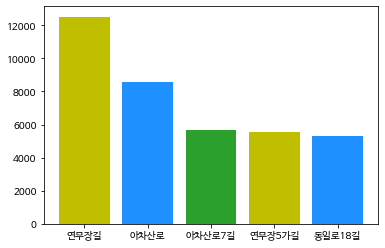

In [ ]:
# 블로그리뷰수 많은 TOP5 시각화
naver2 = naver.copy()
naver_sum2 = find_sum(naver2,'블로그리뷰수')
plt.bar(x,naver_sum2['블로그리뷰수'][:5],color =['y', 'dodgerblue', 'C2'])
plt.xticks(x, naver_sum1.index[:5])
plt.show()